# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 수집

In [2]:
#데이터셋을 로드
from sklearn.datasets import load_boston

boston = load_boston()

####  데이터 이해

In [ ]:
#데이터셋 정보확인

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

![image.png](./images/boston_features.png)

In [5]:
np.set_printoptions(suppress=True)

In [6]:
boston.data

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [9]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
boston_df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가
boston_df['PRICE']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
#데이터의 크기와 형태를 확인
boston_df.shape

(506, 14)

In [12]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [14]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.
boston_df.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [16]:
# CHAS 컬럼 확인
boston_df['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [17]:
boston_df.drop(['CHAS'],axis=1,inplace=True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

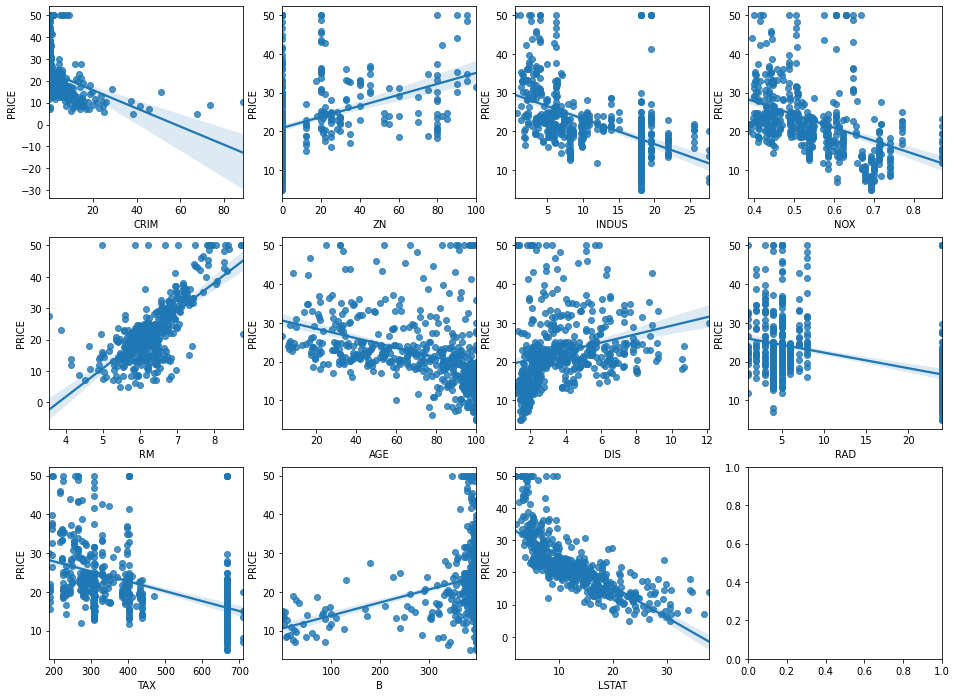

In [24]:
fig,axs=plt.subplots(figsize=(16,12),nrows=3,ncols=4)
x_features=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','B','LSTAT']

for i, feature in enumerate(x_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature,y='PRICE',data=boston_df,ax=axs[row][col])

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)
#### pairplot(): 수치형 변수에 적용 가능

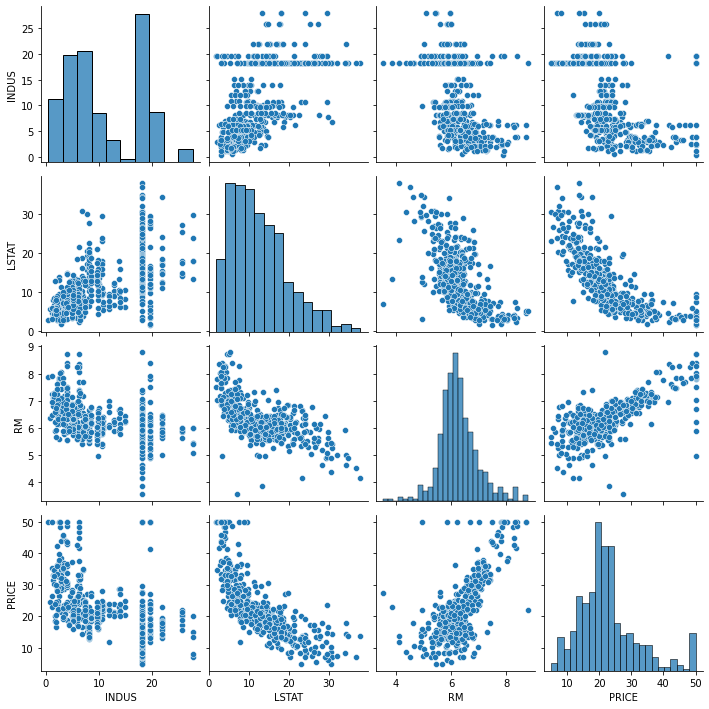

In [25]:
ccol=['INDUS','LSTAT','RM','PRICE']

sns.pairplot(boston_df[ccol])

In [27]:
corrs=boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


<AxesSubplot:>

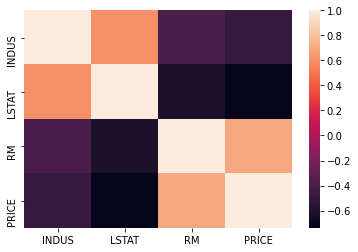

In [30]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
sns.heatmap(corrs)

<AxesSubplot:>

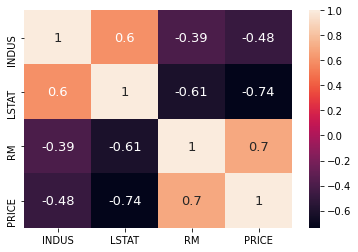

In [31]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션

sns.heatmap(corrs,annot=True,annot_kws={'size':13})

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

### 데이터 준비

#### 데이터 분할

In [33]:
X=boston_df.drop(['PRICE'],axis=1)
y=boston_df['PRICE']
# X(독립변수), Y(종속변수) 분할

from sklearn.model_selection import train_test_split
# 학습용 데이터와 평가용 데이터로 분할하기
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


### 모델 클래스 선택

In [37]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()


### 모델 구축 

In [38]:
#학습 수행

lr.fit(X_train,y_train)


LinearRegression()

### 모델 평가

In [17]:
y_pred=lr.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# 평가용 함수
def eval_score(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    
    print('MSE : ',np.round(mse,3))
    print('RMSE : ',np.round(rmse,3))
    print('R2 : ',np.round(r2,3))

In [43]:
r2=r2_score(y_test,y_pred)

In [41]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred=lr.predict(X_test)

# 평가 지표 계산
eval_score(y_test,y_pred)

MSE :  21.697
RMSE :  4.658
R2 :  0.709


In [44]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n=len(X_train)

#독립변수의 갯수
k=len(X_train.columns)

# 수정된 결정 계수
adj_r2=1-((1-r2)*(n-1)/(n-k-1))

print('Adjusted R2 : {:.4f}'.format(adj_r2))

Adjusted R2 : 0.6986


![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [48]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)
# 회귀 계수와 절편 값 확인

print('y절편 : {:.3f}'.format(lr.intercept_))
print('회귀 계수 : ',np.round(lr.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

y절편 : 31.428
회귀 계수 :  [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [ ]:
# 본래의 출력 옵션


In [52]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef_sort = coef.sort_values(ascending=False)


In [60]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
print('y = '+str(lr.intercept_) + ' +  ' )

for i,c in zip(coef.index,coef.values):
    print('(' + str(c) + ') * ' + str(i) + " + ")

y = 31.42847948230074 +  
(-0.142) * CRIM + 
(0.038) * ZN + 
(0.073) * INDUS + 
(-14.901) * NOX + 
(4.146) * RM + 
(-0.009) * AGE + 
(-1.418) * DIS + 
(0.277) * RAD + 
(-0.01) * TAX + 
(-0.937) * PTRATIO + 
(0.013) * B + 
(-0.566) * LSTAT + 


###  실제값과 예측값의 분포차이를 시각화

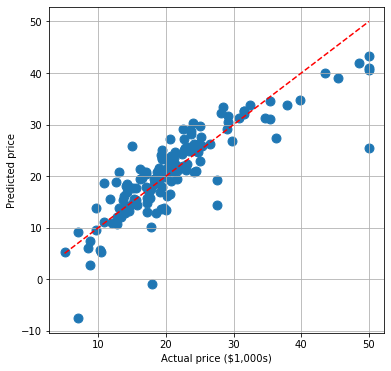

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80) # s : 점의 크기
plt.plot([5,50],[5,50],c='r',ls='--') # 실제값=예측값일때
plt.xlabel('Actual price ($1,000s)')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [64]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.

import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train=sm.add_constant(X_train)
reg=sm.OLS(y_train,X_train).fit()

# 검증 데이터로 예측 수행
X_test=sm.add_constant(X_test)
y_pred=reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           4.52e-91
Time:                        12:14:29   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0

# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

### 데이터 수집

In [3]:
d = load_diabetes()

### 데이터 이해

In [4]:
print(d.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### 데이터 준비

In [5]:
d.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 모델 구축

In [9]:
diabetes=pd.DataFrame(data=d.data,columns=d.feature_names)
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
d.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
diabetes['target']=d.target
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
# 변수 지정 및 할당
X=diabetes.drop(['target'],axis=1)
y=diabetes['target']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
# 모델 적합
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# 학습 수행
lr.fit(X_train,y_train)

LinearRegression()

### 모델 평가

In [19]:
y_pred=lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print('MSE : ',np.round(mse,3))
print('RMSE : ',np.round(rmse,3))
print('R2 : ',np.round(r2,3))

MSE :  2821.739
RMSE :  53.12
R2 :  0.477


In [22]:
n=len(X_train)
k=len(X_train.columns)

In [23]:
# 수정된 결정 계수
adj_r2=1-((1-r2)*(n-1)/(n-k-1))

print('Adjusted R2 : {:.4f}'.format(adj_r2))

Adjusted R2 : 0.4598


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [24]:
# ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)

In [25]:
# 회귀 계수와 절편 값 확인

print('y절편 : {:.3f}'.format(lr.intercept_))
print('회귀 계수 : ',np.round(lr.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

y절편 : 151.008
회귀 계수 :  [  29.25  -261.708  546.297  388.401 -901.953  506.761  121.148  288.029
  659.271   41.375]


In [26]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef_sort = coef.sort_values(ascending=False)

In [27]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
print('y = '+str(lr.intercept_) + ' +  ' )

for i,c in zip(coef.index,coef.values):
    print('(' + str(c) + ') * ' + str(i) + " + ")

y = 151.00818273080338 +  
(29.25) * age + 
(-261.708) * sex + 
(546.297) * bmi + 
(388.401) * bp + 
(-901.953) * s1 + 
(506.761) * s2 + 
(121.148) * s3 + 
(288.029) * s4 + 
(659.271) * s5 + 
(41.375) * s6 + 


###  실제값과 예측값의 분포차이를 시각화

In [28]:
import matplotlib.pyplot as plt

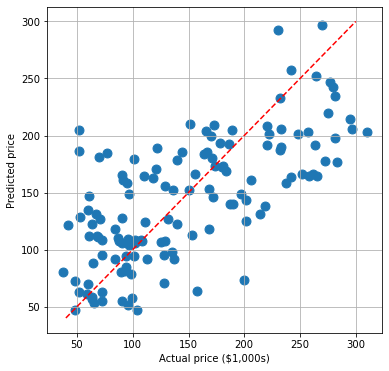

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80) # s : 점의 크기
plt.plot([40,300],[40,300],c='r',ls='--') # 실제값=예측값일때
plt.xlabel('Actual price ($1,000s)')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

# [응용2] 캘리포니아 주택 가격

<img src='./images/cali_house_features.png' width="450" height="450"/>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 데이터 수집 및 탐색

In [33]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')

housing=pd.read_csv('data/california_dataset.csv')
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
# 샘플:20640
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
#속성 :8개
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

### 시각화로 탐색

In [37]:
#데이터프레임으로 변환
housing.head()
# 기초 통계량 확인


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


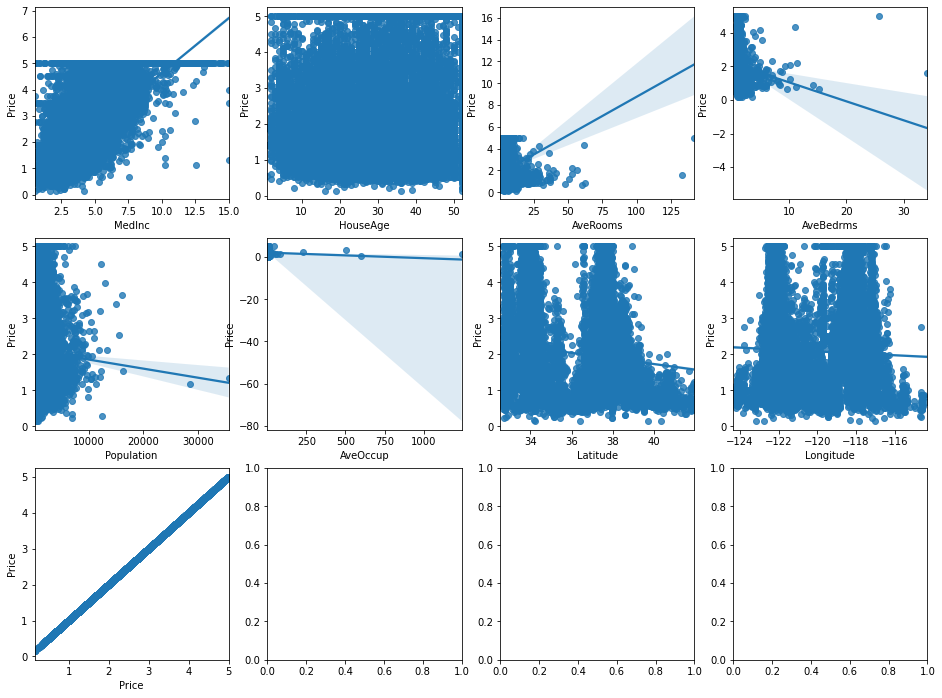

In [38]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs=plt.subplots(figsize=(16,12),nrows=3,ncols=4)
x_features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price']

for i, feature in enumerate(x_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature,y='Price',data=housing,ax=axs[row][col])

In [ ]:
# 독립변수 간 상관관계 확인
# 독립변수 : AveRooms, AveBedrms, Population, AveOccup

In [42]:
ccol=['AveRooms', 'AveBedrms', 'Population', 'AveOccup','Price']
corrs=housing[ccol].corr()
corrs

,AveRooms,AveBedrms,Population,AveOccup,Price
AveRooms,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,-0.004852,-0.006181,0.069863,1.000000,-0.023737
Price,0.151948,-0.046701,-0.024650,-0.023737,1.000000


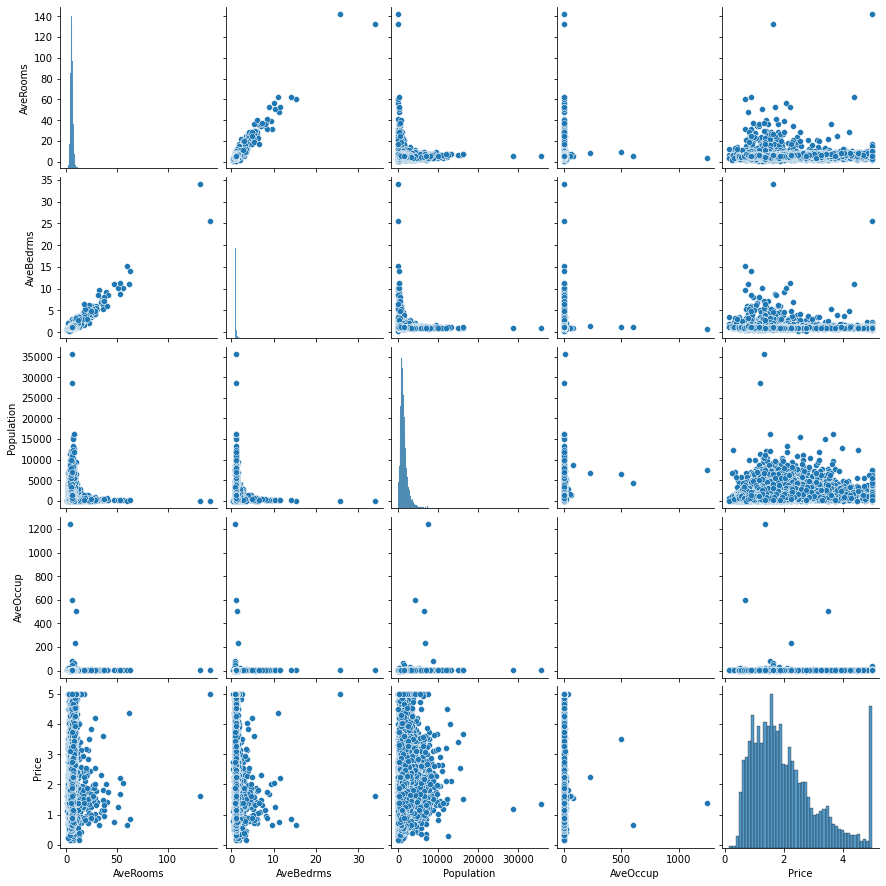

In [44]:
# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
#pairplot 시각화
sns.pairplot(housing[ccol])

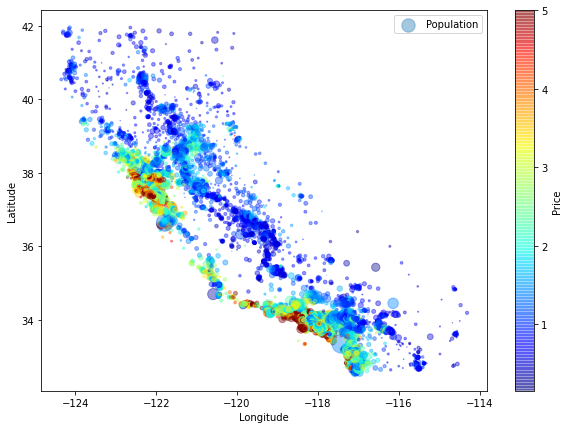

In [60]:
# 위경도 데이터 시각화 (Latitude, Longitude)
# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다
housing.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4,
            s=housing['Population']/100,label='Population',figsize=(10,7),
            c='Price',cmap=plt.get_cmap('jet'),colorbar=True,
            sharex=False)

plt.show()

<AxesSubplot:>

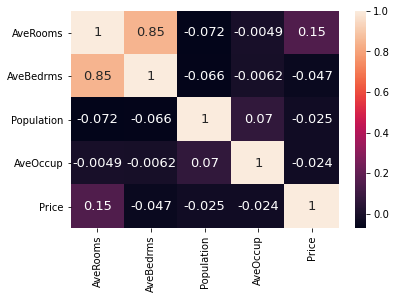

In [49]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
ccol=['AveRooms', 'AveBedrms', 'Population', 'AveOccup','Price']

# 변수 간의 상관 계수를 구한다
corrs=housing[ccol].corr()
#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션
sns.heatmap(corrs,annot=True,annot_kws={'size':13})

y절편 : -37.023
회귀 계수 :  [ 0.449  0.01  -0.123  0.783 -0.    -0.004 -0.42  -0.434]
y = -37.023277706063936 +  
(0.449) * MedInc + 
(0.01) * HouseAge + 
(-0.123) * AveRooms + 
(0.783) * AveBedrms + 
(-0.0) * Population + 
(-0.004) * AveOccup + 
(-0.42) * Latitude + 
(-0.434) * Longitude + 


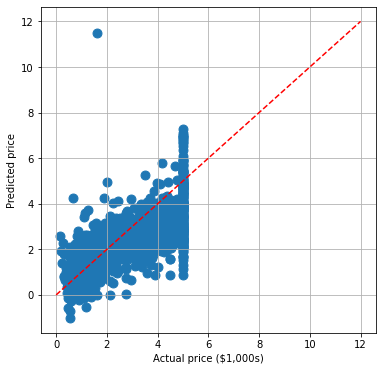

In [65]:
# 선형회귀 모델 구축
X=housing.drop(['Price'],axis=1)
y=housing['Price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# 회귀식으로 표현
np.set_printoptions(suppress=True)
print('y절편 : {:.3f}'.format(lr.intercept_))
print('회귀 계수 : ',np.round(lr.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
coef_sort = coef.sort_values(ascending=False)

print('y = '+str(lr.intercept_) + ' +  ' )

for i,c in zip(coef.index,coef.values):
    print('(' + str(c) + ') * ' + str(i) + " + ")
# 결과 시각화 ( actual price VS predicted price)
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80) # s : 점의 크기
plt.plot([0,12],[0,12],c='r',ls='--') # 실제값=예측값일때
plt.xlabel('Actual price ($1,000s)')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [66]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred=lr.predict(X_test)

# 평가 지표 계산
def eval_score(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    
    print('MSE : ',np.round(mse,3))
    print('RMSE : ',np.round(rmse,3))
    print('R2 : ',np.round(r2,3))
eval_score(y_test,y_pred)

#데이터의 크기
n=len(X_train)

#독립변수의 갯수
k=len(X_train.columns)

# 수정된 결정 계수 확인(Ajusted-R2)
adj_r2=1-((1-r2)*(n-1)/(n-k-1))
# 수정된 결정 계수
print('Adjusted R2 : {:.4f}'.format(adj_r2))

MSE :  0.556
RMSE :  0.746
R2 :  0.576
Adjusted R2 : 0.4770


# [도전] 펭귄 몸무게 예측(dacon)

In [70]:
train=pd.read_csv('penguin/train.csv')
test=pd.read_csv('penguin/test.csv')
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [72]:
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [80]:
# 문자로 되어 있는 칼럼들을 LabelEncoding을 통해 변경
# train
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
train['Species']=encoder.fit_transform(train['Species'].values)
train['Island']=encoder.fit_transform(train['Island'].values)
train['Clutch Completion']=encoder.fit_transform(train['Clutch Completion'].values)
# train['Sex']=encoder.fit_transform(train['Sex'].values)

In [82]:
train['Sex']=train['Sex'].map({'MALE':1,'FEMALE':0})

In [83]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,2,0,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800
2,2,2,0,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400
3,3,2,0,1,44.5,14.7,214,0.0,8.20106,-26.16524,4850
4,4,2,0,0,49.6,16.0,225,1.0,8.38324,-26.84272,5700


In [86]:
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [87]:
# test 데이터 label encoding
encoder=LabelEncoder()
test['Species']=encoder.fit_transform(test['Species'].values)
test['Island']=encoder.fit_transform(test['Island'].values)
test['Clutch Completion']=encoder.fit_transform(test['Clutch Completion'].values)
test['Sex']=test['Sex'].map({'MALE':1,'FEMALE':0})

In [85]:
train.columns

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

In [94]:
# NaN 데이터 제거
train.dropna(inplace=True)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   109 non-null    int64  
 1   Species              109 non-null    int64  
 2   Island               109 non-null    int64  
 3   Clutch Completion    109 non-null    int64  
 4   Culmen Length (mm)   109 non-null    float64
 5   Culmen Depth (mm)    109 non-null    float64
 6   Flipper Length (mm)  109 non-null    int64  
 7   Sex                  109 non-null    float64
 8   Delta 15 N (o/oo)    109 non-null    float64
 9   Delta 13 C (o/oo)    109 non-null    float64
 10  Body Mass (g)        109 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 10.2 KB


In [96]:
X=train.drop(['Body Mass (g)'],axis=1)
y=train['Body Mass (g)']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred=lr.predict(X_test)

In [99]:
eval_score(y_test,y_pred)

MSE :  218353.28
RMSE :  467.283
R2 :  0.708


In [100]:
# ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)
# 회귀 계수와 절편 값 확인

print('y절편 : {:.3f}'.format(lr.intercept_))
print('회귀 계수 : ',np.round(lr.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

y절편 : -2567.280
회귀 계수 :  [   2.089  202.81  -140.191   37.275    6.426   30.51    19.772  383.686
 -204.757 -129.606]


In [101]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef_sort = coef.sort_values(ascending=False)

In [102]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
print('y = '+str(lr.intercept_) + ' +  ' )

for i,c in zip(coef.index,coef.values):
    print('(' + str(c) + ') * ' + str(i) + " + ")

y = -2567.279890890057 +  
(2.089) * id + 
(202.81) * Species + 
(-140.191) * Island + 
(37.275) * Clutch Completion + 
(6.426) * Culmen Length (mm) + 
(30.51) * Culmen Depth (mm) + 
(19.772) * Flipper Length (mm) + 
(383.686) * Sex + 
(-204.757) * Delta 15 N (o/oo) + 
(-129.606) * Delta 13 C (o/oo) + 


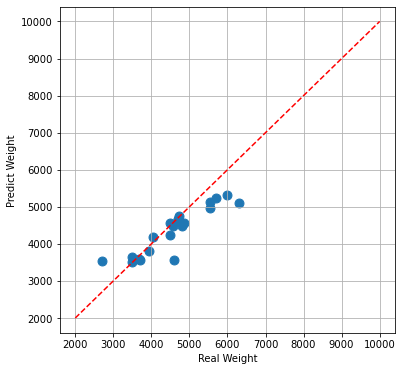

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80) # s : 점의 크기
plt.plot([2000,10000],[2000,10000],c='r',ls='--') # 실제값=예측값일때
plt.xlabel('Real Weight')
plt.ylabel('Predict Weight')
plt.grid()
plt.show()

In [106]:
# test 데이터에 적용
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1,1,1,52.0,20.7,210.0,1.0,9.43146,-24.68440
1,1,2,0,1,55.9,17.0,228.0,1.0,8.31180,-26.35425
2,2,0,1,1,38.9,18.8,190.0,0.0,8.36936,-26.11199
3,3,1,1,1,45.2,16.6,191.0,0.0,9.62357,-24.78984
4,4,0,0,0,37.9,18.6,172.0,0.0,8.38404,-25.19837


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   228 non-null    int64  
 1   Species              228 non-null    int32  
 2   Island               228 non-null    int32  
 3   Clutch Completion    228 non-null    int32  
 4   Culmen Length (mm)   228 non-null    float64
 5   Culmen Depth (mm)    228 non-null    float64
 6   Flipper Length (mm)  228 non-null    float64
 7   Sex                  222 non-null    float64
 8   Delta 15 N (o/oo)    219 non-null    float64
 9   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 15.3 KB


In [109]:
test.dropna(inplace=True)

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   215 non-null    int64  
 1   Species              215 non-null    int32  
 2   Island               215 non-null    int32  
 3   Clutch Completion    215 non-null    int32  
 4   Culmen Length (mm)   215 non-null    float64
 5   Culmen Depth (mm)    215 non-null    float64
 6   Flipper Length (mm)  215 non-null    float64
 7   Sex                  215 non-null    float64
 8   Delta 15 N (o/oo)    215 non-null    float64
 9   Delta 13 C (o/oo)    215 non-null    float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 16.0 KB


In [112]:
test['Body Mass (g)']=lr.predict(test)

In [113]:
test

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,1,1,1,52.0,20.7,210.0,1.0,9.43146,-24.68440,4302.289674
1,1,2,0,1,55.9,17.0,228.0,1.0,8.31180,-26.35425,5361.134451
2,2,0,1,1,38.9,18.8,190.0,0.0,8.36936,-26.11199,3584.875223
3,3,1,1,1,45.2,16.6,191.0,0.0,9.62357,-24.78984,3354.737749
4,4,0,0,0,37.9,18.6,172.0,0.0,8.38404,-25.19837,3202.122093
...,...,...,...,...,...,...,...,...,...,...,...
223,223,1,1,1,49.3,19.9,203.0,1.0,9.88809,-24.59513,4482.839443
224,224,2,0,1,46.5,14.8,217.0,0.0,8.58487,-26.59290,5073.227849
225,225,2,0,1,46.5,13.5,210.0,0.0,7.99530,-25.32829,4854.063740
226,226,1,1,1,50.5,19.6,201.0,1.0,9.80590,-24.72940,4482.349846


# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

In [271]:
train=pd.read_csv('bikepredict/train.csv',index_col='datetime')
test=pd.read_csv('bikepredict/test.csv',index_col='datetime')
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [272]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB


In [274]:
train.drop(['casual'],axis=1,inplace=True)
train.drop(['registered'],axis=1,inplace=True)

In [275]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168


In [276]:
X=train.drop(['count'],axis=1)
y=train['count']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [277]:
y

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [278]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()


#학습 수행

lr.fit(X_train,y_train)

LinearRegression()

In [279]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred=lr.predict(X_test)

# 평가 지표 계산
eval_score(y_test,y_pred)

MSE :  23906.815
RMSE :  154.618
R2 :  0.276


In [280]:
#데이터의 크기
n=len(X_train)

#독립변수의 갯수
k=len(X_train.columns)

# 수정된 결정 계수
adj_r2=1-((1-r2)*(n-1)/(n-k-1))

print('Adjusted R2 : {:.4f}'.format(adj_r2))

Adjusted R2 : 0.4768


In [281]:
# ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)
# 회귀 계수와 절편 값 확인

print('y절편 : {:.4f}'.format(lr.intercept_))
print('회귀 계수 : ',np.round(lr.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

y절편 : 137.3077
회귀 계수 :  [ 22.868 -10.279   0.122   5.279   1.625   5.714  -3.042   0.734]


In [282]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef_sort = coef.sort_values(ascending=False)


#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
print('y = '+str(lr.intercept_) + ' +  ' )

for i,c in zip(coef.index,coef.values):
    print('(' + str(c) + ') * ' + str(i) + " + ")

y = 137.30769417187054 +  
(22.868) * season + 
(-10.279) * holiday + 
(0.122) * workingday + 
(5.279) * weather + 
(1.625) * temp + 
(5.714) * atemp + 
(-3.042) * humidity + 
(0.734) * windspeed + 


In [283]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

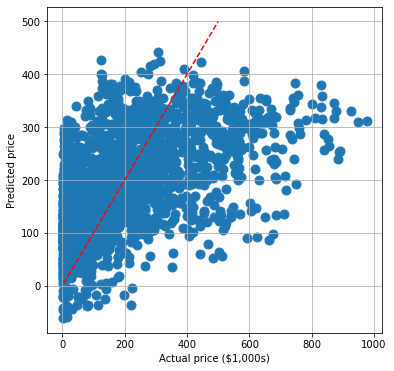

In [284]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,s=80) # s : 점의 크기
plt.plot([5,500],[5,500],c='r',ls='--') # 실제값=예측값일때
plt.xlabel('Actual price ($1,000s)')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [285]:
y_test

datetime
2011-07-19 11:00:00    127
2012-01-16 06:00:00     13
2011-12-11 18:00:00    163
2012-08-15 10:00:00    233
2012-06-15 23:00:00    222
                      ... 
2011-05-08 17:00:00    351
2012-01-17 04:00:00      2
2012-11-04 14:00:00    509
2012-01-01 05:00:00      5
2012-05-15 13:00:00    239
Name: count, Length: 2178, dtype: int64

In [286]:
print(y_test)

datetime
2011-07-19 11:00:00    127
2012-01-16 06:00:00     13
2011-12-11 18:00:00    163
2012-08-15 10:00:00    233
2012-06-15 23:00:00    222
                      ... 
2011-05-08 17:00:00    351
2012-01-17 04:00:00      2
2012-11-04 14:00:00    509
2012-01-01 05:00:00      5
2012-05-15 13:00:00    239
Name: count, Length: 2178, dtype: int64


In [287]:
print(y_pred)

[315.86982513  40.92678568 178.49750562 ... 265.43804981  25.07105754
 202.25843959]


In [288]:
# test에 적용
lr.predict(test)

array([96.55274033, 90.43927465, 90.43927465, ..., 82.02995487,
       97.04329275, 69.66181341])

In [289]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


In [290]:
train.columns, test.columns

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'count'],
       dtype='object'),
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed'],
       dtype='object'))

In [291]:
test['count']=lr.predict(test).astype('int')
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,96
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,90
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,90
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,94
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,94


------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor